In [1]:
%matplotlib inline
import SemDiff as sd
import pandas as pd
from gensim.models import Word2Vec

In [2]:
# load data samples
intro = pd.read_csv('~/Documents/CWTS_Server/introduction_million_sample.rpt', sep = "\t")
methods = pd.read_csv('~/Documents/CWTS_Server/methods_million_sample.rpt', sep = "\t")

In [3]:
# Due to the time it takes to train, lets only use a fraction of the total 
intro = intro.loc[:50000, :]
methods = methods.loc[:50000, ]

In [4]:
# Here we preprocess the sentence data, removing whitespace, punctuation, and non-alphanumeric characteris
intro_features = sd.preprocess_data(intro, 
                                    text_col='text', 
                                    duplicate_cols = ['doi', 'sentence_seq'], 
                                    verbose=True)

methods_features = sd.preprocess_data(methods, 
                                      text_col='text', 
                                      duplicate_cols = ['doi', 'sentence_seq'], 
                                      verbose=True)

Total time: 2.258315086364746 secs
Total time: 2.209052085876465 secs


In [5]:
# First train the model for the introduction data
intro_model = sd.build_gensim_model(intro_features, min_word_count = 10, verbose = False)

In [6]:
# Next, use the method dataset
methods_model = sd.build_gensim_model(methods_features, min_word_count = 10, verbose = False)

In [7]:
# Save the models
intro_model.save("intro_citance_model.wv");
methods_model.save("methods_citance_model.wv");

In [8]:
# Now load the models, just to demonstrate how it works
intro_model = Word2Vec.load("intro_citance_model.wv")
methods_model = Word2Vec.load("methods_citance_model.wv")

In [9]:
shared = sd.get_shared_words(intro_model, methods_model, topn_words = 100)
shared[:5]

['the', 'of', 'and', 'in', 'a']

In [10]:
df = sd.model_term_similarity(intro_model, methods_model, "theory", shared)
df

,x,y,word
0,0.414471,0.485317,theory
1,0.101904,0.193925,theory
2,-0.137927,0.016377,theory
3,0.143221,0.039052,theory
4,0.398442,0.291116,theory
5,-0.060000,0.023899,theory
6,0.193162,0.442461,theory
7,0.223708,0.128398,theory
8,0.368263,0.346272,theory
9,-0.179070,-0.181794,theory


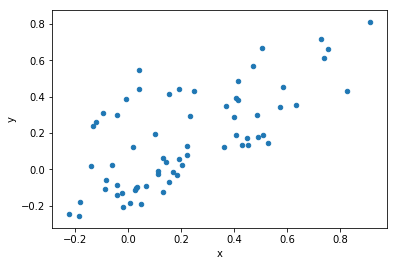

In [11]:
import matplotlib
df.plot('x', 'y', kind='scatter')